In [18]:
import numpy as np
import numpy.linalg as npl
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
import math

## Esercizio 1

Si consideri il polinomio $$L(x)=(1/2) (5x^3-3x)$$ $x \in [-1,1]$

In [14]:
a, b = -1, 1
x = sym.symbols("x")
f = 0.5 * (5 * (x**3) - 3 * x)
df = sym.diff(f, x, 1)
fp = sym.lambdify(x, df, np)
f = lambda x: 0.5 * (5 * (x**3) - 3 * x)

Si visualizzi il grafico del polinomio in [-1,1]

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

In [9]:
def newton(fname, fpname, x0, tolx, tolf, nmax):
    """
    Implementa il metodo di Newton per il calcolo degli zeri di un'equazione non lineare.

    Parametri:
            fname: La funzione di cui si vuole calcolare lo zero.
            fpname: La derivata prima della funzione di  cui si vuole calcolare lo zero.
            x0: iterato iniziale
            tolx: La tolleranza di errore tra due iterati successivi
            tolf: tolleranza sul valore della funzione
            nmax: numero massimo di iterazione

    Restituisce:
            Lo zero approssimato della funzione, il numero di iterazioni e la lista degli iterati intermedi.
    """
    xk = []
    fx0 = fname(x0)
    fpx0 = fpname(x0)
    if abs(fpx0) <= np.spacing(1):  # to do
        print(" derivata prima nulla in x0")
        return None, None, None

    d = fx0 / fpx0
    x1 = x0 - d

    fx1 = fname(x1)
    xk.append(x1)
    it = 1

    while it <= nmax and abs(fx0) >= tolf and abs(x1) >= tolx:
        x0 = x1
        fx0 = fname(x0)
        fpx0 = fpname(x0)
        if abs(fpx0) <= np.spacing(
            1
        ):  # Se la derivata prima e' pià piccola della precisione di macchina stop
            print(" derivata prima nulla in x0")
            return None, None, None
        d = fx0 / fpx0

        x1 = x0 - d
        fx1 = fname(x1)
        it = it + 1

        xk.append(x1)

    if it == nmax:
        print("raggiunto massimo numero di iterazioni \n")

    return x1, it, xk

- Si implementi il metodo di Bisezione per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

In [10]:
def sign(x):
    return math.copysign(1, x)

In [30]:
def metodo_bisezione(fname, a, b, tolx, tolf):
    """
    Implementa il metodo di bisezione per il calcolo degli zeri di un'equazione non lineare.

    Parametri:
            f: La funzione da cui si vuole calcolare lo zero.
            a: L'estremo sinistro dell'intervallo di ricerca.
            b: L'estremo destro dell'intervallo di ricerca.
            tol: La tolleranza di errore.

    Restituisce:
            Lo zero approssimato della funzione, il numero di iterazioni e la lista di valori intermedi.
    """
    fa = fname(a)
    fb = fname(b)
    if sign(fa) * sign(fb) >= 0:
        print("Non è possibile applicare il metodo di bisezione \n")
        return None, None, None

    it = 0
    v_xk = []

    maxit = math.ceil(math.log((b - a) / tolx) / math.log(2)) - 1

    while abs(b - a) >= tolx:  # to do
        xk = a + (b - a) / 2
        v_xk.append(xk)
        it += 1
        fxk = fname(xk)
        if fxk == 0:
            return xk, it, v_xk

        if sign(fa) * sign(fxk) > 0:
            a = xk
            fa = fxk
        elif sign(fxk) * sign(fb) > 0:
            b = xk
            fb = fxk

    return xk, it, v_xk

- Si utilizzi il metodo di Newton con iterato iniziale $x_0=1$ per determinare lo zero $x^*$ piu' vicino ad 1. [**Punti 2**]

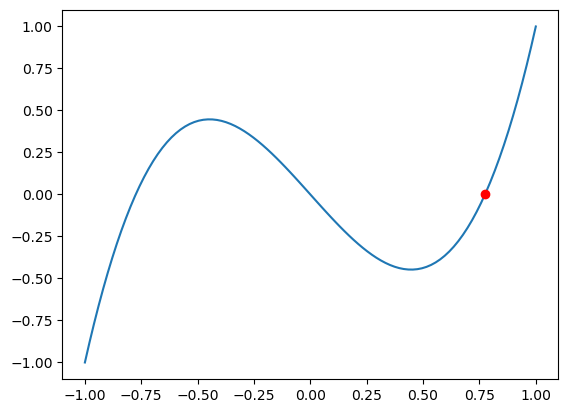

In [23]:
tolx = 1e-12
tolf = 1e-12
nmax = 1000

x0 = 1

xzero, it, vxk = newton(f, fp, x0, tolx, tolf, nmax)

ax = np.linspace(a, b, 100)
y = f(ax)
yzero = f(xzero)
plt.plot(ax, y, xzero, yzero, "ro")
plt.show()

Si consideri la funzione $q(x)=L(x)/(x-x^*)$ dove $x^*$ è lo zero calcolato nel punto precedente. Si applichi il metodo di Newton con iterato iniziale $x_0=-0.5$ per calcolare uno zero della funzione $q(x)$  e si verifichi che è anche zero di $L(x)$  [**Punti 2**]

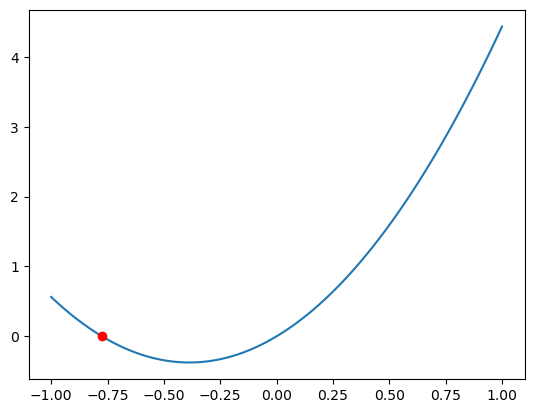

In [26]:
q = f(x) / (x - xzero)
dq = sym.diff(q, x, 1)
qp = sym.lambdify(x, dq, np)

q = lambda x: f(x) / (x - xzero)

x0 = -0.5

xq, itq, vxq = newton(q, qp, x0, tolx, tolf, nmax)

qx = np.linspace(a, b, 100)
qy = q(qx)
plt.plot(qx, qy, xq, q(xq), 'ro')
plt.show()

Si applichi il metodo di bisezione alle funzioni $q(x)$ ed $L(x)$ definite in [-1,1] e si fornisca una spiegazione teorica dei risultati ottenuti  [**Punti 2**]

In [32]:
xbl, itl, vxl = metodo_bisezione(f, a, b, tolx, tolf)
xbq, itq, vxq = metodo_bisezione(q, a, b, tolx, tolf)

Non è possibile applicare il metodo di bisezione 



                                                                                                                Punti [14]